In [1]:
import numpy as np
import pandas as pd
from datetime import date, datetime
import matplotlib.pyplot as plt
%matplotlib inline

# LOADING DATA

The following cells are just loading the different dimensional data given by the client. As we will see we have 5 csv which aim to give an understanding of the data infrastructure (star shape). 
Each table has its own IDs through which we are able to relate variabels from these different data sources.

## DIMENSIONS TABLE

In [2]:
DIM = pd.read_csv("A9002SE2REVSFF_DIM_06212020.csv", sep = "|")
DIM

,LONG,SHORT,TYPE
0,MARKET,MKT,DATA_KEY
1,PRODUCT,PROD,DATA_KEY
2,PERIOD,PER,DATA_KEY
3,FACT,FCT,DATA_VALUE


## RAW FACT_DATA

In [3]:
factdata = pd.read_csv("A9002SE2REVSFF_fact_data_06212020.csv", sep="|")

In [4]:
factdata

,MKT_TAG,PROD_TAG,PER_TAG,U,E,E1,E6601,E6602,E6603,E6604,...,V1,V6601,V6602,V6603,V6604,V6605,DN,DW,IT,SHL.T
0,MTHO7,L4O8DDGU,W2017021,63986003.0,48884310.0,8328750.0,442839.0,1356221.0,1945819.0,3822588.0,...,17968653.0,991225.0,2448511.0,4353182.0,7683493.0,2492243.0,100.0,100.0,1.044635e+09,63440
1,MTHO7,L4O8DDGU,W2017022,67343718.0,51724362.0,8201334.0,551596.0,1259473.0,1707840.0,3865304.0,...,18232291.0,1217221.0,2349781.0,3857502.0,8043090.0,2764697.0,100.0,100.0,1.061395e+09,63470
2,MTHO7,L4O8DDGU,W2017023,64943226.0,49853834.0,8974358.0,580525.0,1547410.0,2244760.0,3835832.0,...,18959206.0,1251276.0,2645851.0,4765916.0,7665246.0,2630917.0,100.0,100.0,1.059967e+09,63459
3,MTHO7,L4O8DDGU,W2017024,66386803.0,51671245.0,9173591.0,574726.0,1857978.0,2040721.0,3883045.0,...,19322800.0,1283979.0,2983521.0,4322335.0,7989077.0,2743888.0,100.0,100.0,1.058424e+09,63472
4,MTHO7,L4O8DDGU,W2017025,66096192.0,51790416.0,9927863.0,663922.0,1761718.0,2980525.0,3702109.0,...,20694733.0,1432300.0,2901397.0,6021267.0,7587631.0,2752138.0,100.0,100.0,1.057248e+09,63460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7904806,MULSA,P5RBB45L,W2020020,7361.0,1689.0,220.0,4.0,7.0,111.0,98.0,...,2981.0,49.0,117.0,1599.0,1201.0,15.0,85.0,92.0,1.443040e+05,2908
7904807,MULSA,P5RBB45L,W2020021,6743.0,1556.0,201.0,11.0,29.0,62.0,99.0,...,2598.0,116.0,261.0,985.0,1224.0,11.0,84.0,91.0,1.432230e+05,2909
7904808,MULSA,P5RBB45L,W2020022,6471.0,1462.0,227.0,5.0,3.0,64.0,154.0,...,3819.0,46.0,85.0,820.0,2854.0,13.0,85.0,91.0,1.430210e+05,2911
7904809,MULSA,P5RBB45L,W2020023,6197.0,1406.0,268.0,0.0,9.0,49.0,209.0,...,4998.0,0.0,158.0,739.0,4093.0,7.0,85.0,92.0,1.394440e+05,2914


Note that **rows** are identified by Market, Product and Period.

**Columns** represent how the transaction conditions, if they had promotions, which was the volume and value, units and items, etc.

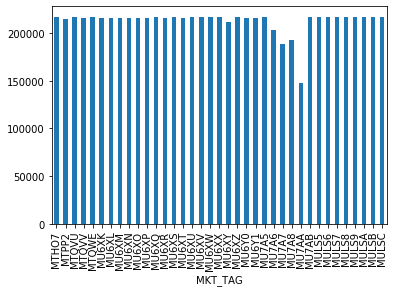

In [5]:
factdata.groupby('MKT_TAG')['U'].count().plot(kind='bar')

In [6]:
# CHECKING NO DUPLICATES:

duplicateFact = factdata[factdata.duplicated()]
duplicateFact

,MKT_TAG,PROD_TAG,PER_TAG,U,E,E1,E6601,E6602,E6603,E6604,...,V1,V6601,V6602,V6603,V6604,V6605,DN,DW,IT,SHL.T


## FACT_metadata

In [7]:
FCT = pd.read_csv("A9002SE2REVSFF_FCT_06212020.csv", encoding="latin", sep="|")

In [8]:
FCT.tail(5)

,TAG,SHORT,LONG,DISPLAY_ORDER,CURRENCY,PRECISION,DENOMINATOR,MKT_AGGREGATION,PROD_AGGREGATION,PER_AGGREGATION,FACT_TYPE
14,V6605,Vtas (Valor) (resto promociones),Vtas (Valor) (resto promociones),15,EUR,2,1000,NaN,NaN,NaN,NaN
15,DN,Dist. Numrica (S),Dist. Numrica (S),16,EUR,0,1,NaN,NaN,NaN,NaN
16,DW,Distribuci¢n Ponderada (S),Distribuci¢n Ponderada (S),17,EUR,0,1,NaN,NaN,NaN,NaN
17,IT,N. de Items (S),N. de Items (S),18,EUR,1,1,NaN,NaN,NaN,NaN
18,SHL.T,Universo,Universo,19,EUR,0,1,NaN,NaN,NaN,NaN


Note now the rows are the meta data of previous product table's columns.

## MARKET Data

In [9]:
MKT= pd.read_csv("A9002SE2REVSFF_MKT_06212020.csv", sep="|")

In [10]:
MKT.sample(5)

,TAG,SHORT,LONG,DISPLAY_ORDER,PARENT_TAG,HIER_NUM,HIER_NAME,HIER_LEVEL_NUM,HIER_LEVEL_NAME
25,MU7A7,EESS,ES ESPANA+EESS EESS+INDEP EESS,26,NaN,NaN,NaN,NaN,NaN
31,MULSB,10.000 - 20.000 hab.,ES TOTAL SUPER + HIPER P&B 10.000 - 20.000 hab.,32,NaN,NaN,NaN,NaN,NaN
32,MULS9,100.000 - 500.000 hab.,ES TOTAL SUPER + HIPER P&B 100.000 - 500.000 hab.,33,NaN,NaN,NaN,NaN,NaN
19,MU6XK,La Rioja,ES ORG H+S La Rioja,20,NaN,NaN,NaN,NaN,NaN
29,MULS5,Touristic Municipalities,ES Touristic Municipalities,30,NaN,NaN,NaN,NaN,NaN


Notice we can find some hierarchies in this data table. We find from national level to regional one, the same with the different kinf of clients of Nielsen, aggregating them in some market tags ("ES ORG H+S", finding also "ES ORG H+S SUPER" itself).

**ES ORG H+S** is going to be our main focus (Hipers and Supers)

**EESS** = petrol station (estaciones de servicio)

Moreover, **GEOGRAPHIES** are also included, which will also be taken into consideration as the covid behavior was not the
 same nationwide.

## PERIODIC Data

In [11]:
PER = pd.read_csv("A9002SE2REVSFF_PER_06212020.csv", sep="|")
PER.sample(4)

,TAG,SHORT,LONG,DISPLAY_ORDER,PARENT_TAG,HIER_NUM,HIER_NAME,HIER_LEVEL_NUM,HIER_LEVEL_NAME
16,W2017037,SEMANA 37-17,SEMANA 37-17 (17-09-17),17,NaN,NaN,NaN,NaN,NaN
93,W2019010,SEMANA 10-19,SEMANA 10-19 (10-03-19),94,NaN,NaN,NaN,NaN,NaN
123,W2019040,SEMANA 40-19,SEMANA 40-19 (06-10-19),124,NaN,NaN,NaN,NaN,NaN
110,W2019027,SEMANA 27-19,SEMANA 27-19 (07-07-19),111,NaN,NaN,NaN,NaN,NaN


Same logic than previous tables, here we can find the metadata of the weeks when the facts have ocurred.

## PRODUCT Data

In [12]:
PROD = pd.read_csv("A9002SE2REVSFF_PROD_06212020.csv", sep="|")
PROD.sample(4)

,TAG,SHORT,LONG,DISPLAY_ORDER,PARENT_TAG,HIER_NUM,HIER_NAME,HIER_LEVEL_NUM,HIER_LEVEL_NAME,TOTAL PGC,SECTOR,SECCION,CATEGORIA,FAMILIA,TIPO DE MARCA
817,P4XVCE2O,CONCENTRADOS M.D.,SUAVIZANTES ROPA. CONCENTRADOS M.D.,818,P4XVCCYW,1,641434T.AECOC SEMANAL,6,TIPO DE MARCA,TOTAL PGC,DROGUERIA Y PERFUMERIA,DROGUERIA Y LIMPIEZA,SUAVIZANTES ROPA.,CONCENTRADOS,M.D.
223,P4XVCD6H,CARAMELO MASTICABLE M.D.,GOLOSINAS CARAMELO MASTICABLE M.D.,224,P4XVCCAC,1,641434T.AECOC SEMANAL,6,TIPO DE MARCA,TOTAL PGC,ALIM. Y BEBIDAS,ALIM.SECA,GOLOSINAS,CARAMELO MASTICABLE,M.D.
729,P4XVCE4B,BOLSAS DE BASURA M.F.,COMPLEMENTOS COCINA BOLSAS DE BASURA M.F.,730,P4XVCCZS,1,641434T.AECOC SEMANAL,6,TIPO DE MARCA,TOTAL PGC,DROGUERIA Y PERFUMERIA,DROGUERIA Y LIMPIEZA,COMPLEMENTOS COCINA,BOLSAS DE BASURA,M.F.
638,P4XVCCMM,RESTO CONS.VEGETALES,CONSERVAS VEGETALES RESTO CONS.VEGETALES,639,L4O8DDFW,1,641434T.AECOC SEMANAL,5,FAMILIA,TOTAL PGC,ALIM. Y BEBIDAS,CONSERVAS,CONSERVAS VEGETALES,RESTO CONS.VEGETALES,NaN


The product csv includes all hierarchies, mixed within the rows, but we can observe how it follows a top-down order in the hierarchy

If we develop this family product trees we can go from 4 nodes in level 2, to +350 in level 6.

# DATA BRIEF UNDERSTANDING

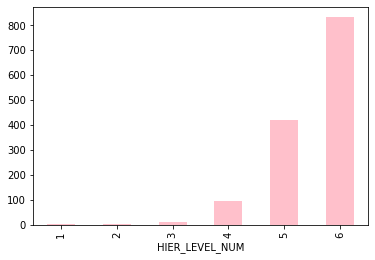

In [13]:
PROD.groupby('HIER_LEVEL_NUM')['LONG'].count().plot(kind='bar', color= 'pink')
#6 hierarchies ie tree structure.

In [14]:
pd.DataFrame(PROD.groupby(['HIER_LEVEL_NUM'])['TAG'].count())

,TAG
HIER_LEVEL_NUM,
1,1
2,3
3,11
4,95
5,420
6,832


Obvouisly, the most frequent value of the hierarchy is gonna be the sixth one, the one cointaining the most granular information of the product in case. 

In [15]:
PROD[PROD['HIER_LEVEL_NUM']==1]

,TAG,SHORT,LONG,DISPLAY_ORDER,PARENT_TAG,HIER_NUM,HIER_NAME,HIER_LEVEL_NUM,HIER_LEVEL_NAME,TOTAL PGC,SECTOR,SECCION,CATEGORIA,FAMILIA,TIPO DE MARCA
0,L4O8DDGU,TOTAL PGC,TOTAL PGC,1,NaN,1,641434T.AECOC SEMANAL,1,TOTAL PGC,TOTAL PGC,NaN,NaN,NaN,NaN,NaN


Hiercarchy level 1 is just about "Total PGC", with highest aggregated information level, that's why we find NaN values across the row as it is a 1:N relationship with the rest of product tags.

In [16]:
PROD[PROD['HIER_LEVEL_NUM']==2]

,TAG,SHORT,LONG,DISPLAY_ORDER,PARENT_TAG,HIER_NUM,HIER_NAME,HIER_LEVEL_NUM,HIER_LEVEL_NAME,TOTAL PGC,SECTOR,SECCION,CATEGORIA,FAMILIA,TIPO DE MARCA
1,L4O8DDH0,ALIM. Y BEBIDAS,ALIM. Y BEBIDAS,2,L4O8DDGU,1,641434T.AECOC SEMANAL,2,SECTOR,TOTAL PGC,ALIM. Y BEBIDAS,NaN,NaN,NaN,NaN
704,L4O8DDGW,DROGUERIA Y PERFUMERIA,DROGUERIA Y PERFUMERIA,705,L4O8DDGU,1,641434T.AECOC SEMANAL,2,SECTOR,TOTAL PGC,DROGUERIA Y PERFUMERIA,NaN,NaN,NaN,NaN
1024,L4O8DDGY,PROD.FRESCOS,PROD.FRESCOS,1025,L4O8DDGU,1,641434T.AECOC SEMANAL,2,SECTOR,TOTAL PGC,PROD.FRESCOS,NaN,NaN,NaN,NaN


In [17]:
PROD[PROD['HIER_LEVEL_NUM']==3]

,TAG,SHORT,LONG,DISPLAY_ORDER,PARENT_TAG,HIER_NUM,HIER_NAME,HIER_LEVEL_NUM,HIER_LEVEL_NAME,TOTAL PGC,SECTOR,SECCION,CATEGORIA,FAMILIA,TIPO DE MARCA
2,L4O8DDHM,ALIM.SECA,ALIM.SECA,3,L4O8DDH0,1,641434T.AECOC SEMANAL,3,SECCION,TOTAL PGC,ALIM. Y BEBIDAS,ALIM.SECA,NaN,NaN,NaN
401,L4O8DDHI,BEBIDAS,BEBIDAS,402,L4O8DDH0,1,641434T.AECOC SEMANAL,3,SECCION,TOTAL PGC,ALIM. Y BEBIDAS,BEBIDAS,NaN,NaN,NaN
551,L4O8DDHK,CONSERVAS,CONSERVAS,552,L4O8DDH0,1,641434T.AECOC SEMANAL,3,SECCION,TOTAL PGC,ALIM. Y BEBIDAS,CONSERVAS,NaN,NaN,NaN
663,L4O8DDH2,LECHE Y BATIDOS,LECHE Y BATIDOS,664,L4O8DDH0,1,641434T.AECOC SEMANAL,3,SECCION,TOTAL PGC,ALIM. Y BEBIDAS,LECHE Y BATIDOS,NaN,NaN,NaN
705,L4O8DDH6,DROGUERIA Y LIMPIEZA,DROGUERIA Y LIMPIEZA,706,L4O8DDGW,1,641434T.AECOC SEMANAL,3,SECCION,TOTAL PGC,DROGUERIA Y PERFUMERIA,DROGUERIA Y LIMPIEZA,NaN,NaN,NaN
844,L4O8DDH4,PERFUMERIA E HIGIENE,PERFUMERIA E HIGIENE,845,L4O8DDGW,1,641434T.AECOC SEMANAL,3,SECCION,TOTAL PGC,DROGUERIA Y PERFUMERIA,PERFUMERIA E HIGIENE,NaN,NaN,NaN
1025,L4O8DDHE,CHARCUTERIA,CHARCUTERIA,1026,L4O8DDGY,1,641434T.AECOC SEMANAL,3,SECCION,TOTAL PGC,PROD.FRESCOS,CHARCUTERIA,NaN,NaN,NaN
1074,L4O8DDHC,CONGELADOS,CONGELADOS,1075,L4O8DDGY,1,641434T.AECOC SEMANAL,3,SECCION,TOTAL PGC,PROD.FRESCOS,CONGELADOS,NaN,NaN,NaN
1234,L4O8DDHA,DERV.LACTEOS,DERV.LACTEOS,1235,L4O8DDGY,1,641434T.AECOC SEMANAL,3,SECCION,TOTAL PGC,PROD.FRESCOS,DERV.LACTEOS,NaN,NaN,NaN
1283,L4O8DDHG,PL. COCINADOS Y PRECOCINADOS,PL. COCINADOS Y PRECOCINADOS,1284,L4O8DDGY,1,641434T.AECOC SEMANAL,3,SECCION,TOTAL PGC,PROD.FRESCOS,PL. COCINADOS Y PRECOCINADOS,NaN,NaN,NaN


As we want ot have all the possible information of available for our approach, while not repeating information when not needed, **we will filter the data later on to keep the rows refering to hierarchy level 4**. 
We achieve, by doing so, a sufficient granular level of information in our cleaned and preprocessed dataset, while being able to aggregate it in demand of the end-user.

In [18]:
pd.DataFrame(PROD.groupby(['HIER_LEVEL_NUM', 'TAG'])['SHORT'].sum())

SHORT
HIER_LEVEL_NUM TAG                             
1              L4O8DDGU               TOTAL PGC
2              L4O8DDGW  DROGUERIA Y PERFUMERIA
               L4O8DDGY            PROD.FRESCOS
               L4O8DDH0         ALIM. Y BEBIDAS
3              L4O8DDH2         LECHE Y BATIDOS
...                                         ...
6              P69WJSVC     DESINFECTANTES M.D.
               P69WJSVD              OTROS M.F.
               P69WJSVE              OTROS M.D.
               P69WJSVF       PUERICULTURA M.F.
               P69WJSVG       PUERICULTURA M.D.

[1362 rows x 1 columns]

In [19]:
f = open("A9002SE2REVSFF_meta_data_06212020.TXT", "r")
print(f.read())

################################ METADATA ################################

VERSION                         :         2.0
DELIMITER                       :         '|'
ENCODING_USED                   :         ASCII
CHARACTER_SET_USED              :         IBM850
NEW_LINE_FEED_CHAR              :         '\n'
NUM_OF_DIMENSIONS               :         4

################################ TRANSACTION DETAILS ################################

RECORD_ID                       :         FDS_1044471_DDS_110020485
PROJECT_NAME                    :         A9002SE2REV SFF
COUNTRY                         :         SPAIN
CATEGORY                        :         N/A;
LAST_PERIOD                     :         WEEKLY - W2020024;
DATE_TIME(WITH TIMEZONE)EXPORT  :         20200621 15:19:51 CET
DATA_CENTRE_LOCATION            :         CIP
ARCHIVE_NAME                    :         A9002SE2REVSFF_arch_06212020.zip
ARCHIVE_SIZE                    :         667 MB
NUM_OF_FILES                    :       

---

# DATA PREPROCESSING

In [20]:
FACT = factdata.copy()

We need a suitable date type column which we will extract by realting the period table with the raw fact table. By spliting the "LONG" values in the PERIOD table we will be able to extract the DATE variable, save it as date type variable, and finally, extracting the week and the year in different columns for better representation. 

In [21]:
#Create DATE column from LONG column in the PER table
PER['temp1'] = PER['LONG'].str.split('(')
PER['temp2'] = [item[1] for item in PER['temp1']]
PER['temp3'] = PER['temp2'].str.split(')')
PER['DATE'] = [item[0] for item in PER['temp3']]
PER['DATE'] = pd.to_datetime(PER['DATE'],format='%d-%m-%y')

PER = PER.drop(['temp1', 'temp2', 'temp3'], axis=1)
PER.head(1)
# Note the DATE column at the end:

,TAG,SHORT,LONG,DISPLAY_ORDER,PARENT_TAG,HIER_NUM,HIER_NAME,HIER_LEVEL_NUM,HIER_LEVEL_NAME,DATE
0,W2017021,SEMANA 21-17,SEMANA 21-17 (28-05-17),1,NaN,NaN,NaN,NaN,NaN,2017-05-28


In [22]:
PER.dtypes

TAG                        object
SHORT                      object
LONG                       object
DISPLAY_ORDER               int64
PARENT_TAG                float64
HIER_NUM                  float64
HIER_NAME                 float64
HIER_LEVEL_NUM            float64
HIER_LEVEL_NAME           float64
DATE               datetime64[ns]
dtype: object

In [23]:
# With the datetime library we are able to extract week and year from previous computation:

PER['Año'] = PER['DATE'].dt.year
PER['Mes'] = PER['DATE'].dt.month
PER['Semana'] = PER['DATE'].dt.week
PER.head(1)

,TAG,SHORT,LONG,DISPLAY_ORDER,PARENT_TAG,HIER_NUM,HIER_NAME,HIER_LEVEL_NUM,HIER_LEVEL_NAME,DATE,Año,Mes,Semana
0,W2017021,SEMANA 21-17,SEMANA 21-17 (28-05-17),1,NaN,NaN,NaN,NaN,NaN,2017-05-28,2017,5,21


The following cells will be connecting information from different tables; such as the hirarchy number of the product tag and the name, the period tag with the year/week/date, market tag and name and the stock supply characteristics.

In [24]:
#MARKET TAG:
new_mkt_tag = dict(zip(MKT.TAG, MKT.LONG))
FACT['MKT_LONG'] = FACT['MKT_TAG'].map(new_mkt_tag)

#HIERARCHY NUMBER:
hier_num_dict = dict(zip(PROD.TAG, PROD.HIER_LEVEL_NUM))
FACT['HIERARCHY_NUMBER'] = FACT['PROD_TAG'].map(hier_num_dict)

#PRODUCT TAG:
new_prod_tag = dict(zip(PROD.TAG, PROD.LONG))
FACT['PROD_LONG'] = FACT['PROD_TAG'].map(new_prod_tag)

#PERIOD TAG:
week_tag = dict(zip(PER.TAG, PER.Semana))
date_tag = dict(zip(PER.TAG, PER.DATE))
month_tag = dict(zip(PER.TAG, PER.Mes))
year_tag = dict(zip(PER.TAG, PER.Año))
FACT['WEEK'] = FACT['PER_TAG'].map(week_tag)
FACT['DATE'] = FACT['PER_TAG'].map(date_tag)
FACT['MONTH'] = FACT['PER_TAG'].map(month_tag)
FACT["YEAR"] = FACT['PER_TAG'].map(year_tag)
FACT = FACT.drop(['PER_TAG'], axis=1)

# FACT CHARACTERISTICS:
column_names = dict(zip(FCT.TAG, FCT.SHORT))
FACT = FACT.rename(columns = column_names)

In [25]:
FACT.sample(5)

,MKT_TAG,PROD_TAG,Vtas (Uds),Vtas (Vol),Vtas (Vol) (en promocion),Vtas (Vol) (display + folleto),Vtas (Vol) (display),Vtas (Vol) (folleto),Vtas (Vol) (reduccion temp. de precio),Vtas (Vol) (resto promociones),...,Distribuci¢n Ponderada (S),N. de Items (S),Universo,MKT_LONG,HIERARCHY_NUMBER,PROD_LONG,WEEK,DATE,MONTH,YEAR
3227808,MU6Y0,P4XVCCXH,3198.0,768.0,23.0,NaN,NaN,11.0,11.0,0.0,...,99.0,53029.0,1087,ES ORG H+S Castilla-La Mancha,5,MANTEQUILLA MANTEQUILLA,39,2019-09-29,9,2019
3650609,MU6XY,P5ORVJ0E,3.0,1.0,0.0,NaN,NaN,NaN,0.0,NaN,...,52.0,140.0,21,ES ORG H+S Ceuta y Melilla,6,PLATOS PREPARADOS CONGELADOS ESPECIALIDADES OR...,24,2018-06-17,6,2018
3186261,MU6Y0,P4XVCEAU,181.0,181.0,1.0,NaN,0.0,NaN,1.0,NaN,...,73.0,3370.0,1089,ES ORG H+S Castilla-La Mancha,6,PANALES EMPAPADORES M.D.,45,2019-11-10,11,2019
3911074,MU6XR,P4XVCDEC,579.0,279.0,68.0,NaN,1.0,49.0,19.0,NaN,...,69.0,17974.0,1409,ES ORG H+S Galicia,6,BOLLERIA INDUSTRIAL SOBAOS M.F.,26,2018-07-01,7,2018
841624,MTQVV,P5ORVIZR,2554.0,882.0,121.0,18.0,5.0,41.0,58.0,NaN,...,100.0,35350.0,472,ES ORG H+S HIPER,5,TOS PREPARADOS CONGELADOS PRECOCINADO CORDONBL...,40,2018-10-07,10,2018


In [26]:
FACT_DF = pd.DataFrame(FACT)

In [27]:
# Checking there are no duplicates:

duplicateRowsDF = FACT[FACT.duplicated()]
len(duplicateRowsDF)

0

Now we can see how our data is greedly represented in a single table. To check coherence, if we plot the sum of the amount of units sold and their volume we can see the difference is minimal, demosntrating the granularity that we have been talking about and that can be improved in terms of efficiency.

In [28]:
pd.DataFrame(FACT.groupby('HIERARCHY_NUMBER')[['Vtas (Uds)','Vtas (Vol)', 'N. de Items (S)']].sum())

,Vtas (Uds),Vtas (Vol),N. de Items (S)
HIERARCHY_NUMBER,,,
1,8.227536e+10,6.135736e+10,1.148875e+12
2,8.227536e+10,6.135736e+10,1.148875e+12
3,8.227536e+10,6.135736e+10,1.148875e+12
4,8.227536e+10,6.135736e+10,1.148875e+12
5,8.227537e+10,6.135736e+10,1.148875e+12
6,8.227537e+10,6.135736e+10,1.148875e+12


In [29]:
hierch_market = pd.DataFrame(FACT.groupby(['HIERARCHY_NUMBER','MKT_LONG'])[['Vtas (Uds)']].sum())
hierch_market.head(40)

Vtas (Uds)
HIERARCHY_NUMBER MKT_LONG                                                       
1                ES ESPANA                                          1.066559e+10
                 ES ESPANA+EESS                                     1.079675e+10
                 ES ESPANA+EESS EESS+INDEP                          7.696176e+08
                 ES ESPANA+EESS EESS+INDEP EESS                     1.311566e+08
                 ES ESPANA+EESS EESS+INDEP Indep. <300              6.384610e+08
                 ES ESPANA+EESS ORG H+S                             9.872815e+09
                 ES ESPANA+EESS PERFUMERIAS                         1.543174e+08
                 ES ORG H+S                                         9.872815e+09
                 ES ORG H+S Andalucia                               1.757994e+09
                 ES ORG H+S Aragon                                  2.630566e+08
                 ES ORG H+S Asturias                                2.196545e+08
                 ES ORG H+S Baleares                                2.924885e+08
                 ES ORG H+S C. De Madrid                            1.309629e+09
                 ES ORG H+S C.Valenciana                            1.202389e+09
                 ES ORG H+S Canarias                                5.589108e+08
                 ES ORG H+S Cantabria                               1.416919e+08
                 ES ORG H+S Castilla y Leon                         4.860695e+08
                 ES ORG H+S Castilla-La Mancha                      3.855228e+08
                 ES ORG H+S Cataluna                                1.585492e+09
                 ES ORG H+S Ceuta y Melilla                         2.314744e+07
                 ES ORG H+S Extremadura                             2.100653e+08
                 ES ORG H+S Galicia                                 5.454145e+08
                 ES ORG H+S HIPER                                   1.240494e+09
                 ES ORG H+S La Rioja                                6.461584e+07
                 ES ORG H+S Murcia                                  2.851775e+08
                 ES ORG H+S Navarra                                 1.183939e+08
                 ES ORG H+S Pais Vasco                              4.231016e+08
                 ES ORG H+S SUPER                                   8.632320e+09
                 ES TOTAL ONLINE                                    1.019488e+08
                 ES TOTAL SUPER + HIPER P&B                         9.290756e+09
                 ES TOTAL SUPER + HIPER P&B 10.000 - 20.000 hab.    1.070591e+09
                 ES TOTAL SUPER + HIPER P&B 100.000 - 500.000 hab.  2.270095e+09
                 ES TOTAL SUPER + HIPER P&B 20.000 - 50.000 hab.    1.758223e+09
                 ES TOTAL SUPER + HIPER P&B 50.000 - 100.000 hab.   1.297982e+09
                 ES TOTAL SUPER + HIPER P&B < 10.000 hab.           1.294950e+09
                 ES TOTAL SUPER + HIPER P&B >500.000 hab.           1.534224e+09
                 ES Touristic Municipalities                        1.009439e+09
2                ES ESPANA                                          1.066559e+10
                 ES ESPANA+EESS                                     1.079675e+10
                 ES ESPANA+EESS EESS+INDEP                          7.696176e+08

Remembering the hierarchy present in the market table (MKT), by ranking the market tags regarding their amount of units related to them we can appreciate in the table below the aggregated levels present.

In [30]:
rank = pd.DataFrame(FACT.groupby(['MKT_LONG'])[['Vtas (Uds)']].sum())

rank.sort_values(by='Vtas (Uds)', ascending = False)

,Vtas (Uds)
MKT_LONG,
ES ESPANA+EESS,6.478050e+10
ES ESPANA,6.399354e+10
ES ESPANA+EESS ORG H+S,5.923689e+10
ES ORG H+S,5.923689e+10
ES TOTAL SUPER + HIPER P&B,5.574454e+10
ES ORG H+S SUPER,5.179392e+10
ES TOTAL SUPER + HIPER P&B 100.000 - 500.000 hab.,1.362057e+10
ES TOTAL SUPER + HIPER P&B 20.000 - 50.000 hab.,1.054934e+10
ES ORG H+S Andalucia,1.054796e+10


In [31]:
dict_parent = dict(zip(PROD.TAG, PROD.PARENT_TAG))
FACT['PARENT_TAG'] = FACT['PROD_TAG'].map(dict_parent)
dict_names_parent = dict(zip(PROD.TAG, PROD.LONG))
FACT['PARENT_NAME'] = FACT['PARENT_TAG'].map(dict_names_parent)
FACT[['PROD_TAG', 'PROD_LONG', 'PARENT_TAG', 'PARENT_NAME']]

,PROD_TAG,PROD_LONG,PARENT_TAG,PARENT_NAME
0,L4O8DDGU,TOTAL PGC,NaN,NaN
1,L4O8DDGU,TOTAL PGC,NaN,NaN
2,L4O8DDGU,TOTAL PGC,NaN,NaN
3,L4O8DDGU,TOTAL PGC,NaN,NaN
4,L4O8DDGU,TOTAL PGC,NaN,NaN
...,...,...,...,...
7904806,P5RBB45L,RESTO QUESOS NATURALES RQN.EMPAQUETADO M.F.,P5RBB43L,RESTO QUESOS NATURALES RQN.EMPAQUETADO
7904807,P5RBB45L,RESTO QUESOS NATURALES RQN.EMPAQUETADO M.F.,P5RBB43L,RESTO QUESOS NATURALES RQN.EMPAQUETADO
7904808,P5RBB45L,RESTO QUESOS NATURALES RQN.EMPAQUETADO M.F.,P5RBB43L,RESTO QUESOS NATURALES RQN.EMPAQUETADO
7904809,P5RBB45L,RESTO QUESOS NATURALES RQN.EMPAQUETADO M.F.,P5RBB43L,RESTO QUESOS NATURALES RQN.EMPAQUETADO


In [32]:
# MAP PRODUCT TAG WITH ITS HIERARCHY NUMBER:

hier_prod = dict(zip(PROD.TAG, PROD.HIER_LEVEL_NUM))
FACT['PROD_HIER_NUM'] = FACT['PROD_TAG'].map(hier_prod)

---

# FEATURE ENGINEERING AND CLEANSING

In [33]:
# HERE WE START FOCUSING OUR DATASET:

FACT_focus = pd.DataFrame(FACT.drop(['Vtas (Vol) (display + folleto)', 'Vtas (Vol) (display)', 'Vtas (Vol) (folleto)', 
                                     'Vtas (Vol) (reduccion temp. de precio)', 'Vtas (Vol) (resto promociones)',
                                    'Vtas (Valor) (display + folleto)', 'Vtas (Valor) (display)', 'Vtas (Valor) (folleto)', 
                                     'Vtas (Valor) (reduccion temp. de precio)', 'Vtas (Valor) (resto promociones)',
                                    'PARENT_TAG'],
                                    axis=1
                                   )
                         )

We are going to focus on the specific regions where super and hiper markets would need their stock, looking for an efficient and balanced national supply. That is why we filter the MKT_TAG column to **"MU6"**, as every region's tag starts with this string pattern.

Moreover, it is going to ease further analysis like clustering, which aims to find characteristic market behaviours and, thus, clusters from which understand better these regions.

All in all, as the satate of alarm have hit different across the Spanish market, we will try to capture this infromation by adding valuable information to the dataset and modeling it in a coherent way that can understand why each week, each product and each market behaved how they did. And how would they behave if the scenario changes.

In [34]:
FACT_focus = FACT_focus[FACT_focus['MKT_TAG'].str.contains("MU6")]

In [35]:
FACT_focus[FACT_focus['HIERARCHY_NUMBER']==4]

,MKT_TAG,PROD_TAG,Vtas (Uds),Vtas (Vol),Vtas (Vol) (en promocion),Vtas (Valor),Vtas (Valor) (en promocion),Dist. Numrica (S),Distribuci¢n Ponderada (S),N. de Items (S),Universo,MKT_LONG,HIERARCHY_NUMBER,PROD_LONG,WEEK,DATE,MONTH,YEAR,PARENT_NAME,PROD_HIER_NUM
1084033,MU6XW,L4O8DDGT,103127.0,165736.0,23826.0,464609.0,74448.0,100.0,100.0,901178.0,4319,ES ORG H+S Andalucia,4,ACEITE,21,2017-05-28,5,2017,ALIM.SECA,4
1084034,MU6XW,L4O8DDGT,109524.0,176885.0,21600.0,506004.0,69708.0,98.0,100.0,893118.0,4324,ES ORG H+S Andalucia,4,ACEITE,22,2017-06-04,6,2017,ALIM.SECA,4
1084035,MU6XW,L4O8DDGT,103098.0,165671.0,23894.0,468431.0,71477.0,100.0,100.0,880789.0,4321,ES ORG H+S Andalucia,4,ACEITE,23,2017-06-11,6,2017,ALIM.SECA,4
1084036,MU6XW,L4O8DDGT,102248.0,157511.0,22105.0,451754.0,71183.0,100.0,100.0,873497.0,4324,ES ORG H+S Andalucia,4,ACEITE,24,2017-06-18,6,2017,ALIM.SECA,4
1084037,MU6XW,L4O8DDGT,100023.0,154989.0,21788.0,446849.0,71710.0,100.0,100.0,883176.0,4325,ES ORG H+S Andalucia,4,ACEITE,25,2017-06-25,6,2017,ALIM.SECA,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4975244,MU6XQ,L4O8DDCK,4240.0,1237.0,150.0,13802.0,1701.0,90.0,99.0,58810.0,977,ES ORG H+S Pais Vasco,4,RESTO QUESOS NATURALES,20,2020-05-17,5,2020,QUESOS,4
4975245,MU6XQ,L4O8DDCK,4118.0,1201.0,74.0,13105.0,874.0,87.0,98.0,57703.0,977,ES ORG H+S Pais Vasco,4,RESTO QUESOS NATURALES,21,2020-05-24,5,2020,QUESOS,4
4975246,MU6XQ,L4O8DDCK,3408.0,1041.0,79.0,11051.0,822.0,87.0,98.0,56842.0,978,ES ORG H+S Pais Vasco,4,RESTO QUESOS NATURALES,22,2020-05-31,5,2020,QUESOS,4
4975247,MU6XQ,L4O8DDCK,3554.0,1080.0,144.0,11812.0,1813.0,87.0,98.0,58145.0,977,ES ORG H+S Pais Vasco,4,RESTO QUESOS NATURALES,23,2020-06-07,6,2020,QUESOS,4


As we said, we will be interested on keeping only hierarchy level =<4 kind of rows, and we will add later their succesor levels to keep the information.

In [36]:
FACT_focus_h6 = FACT_focus[FACT_focus.HIERARCHY_NUMBER == 4]

Adding corresponding hierarchy level names:

In [37]:
# Mapping the hierarchal levels to our ocurrence of hierarchy 4, this way, we can still applying aggregated approaches:

totalpgc = dict(zip(PROD.TAG, PROD['TOTAL PGC']))
FACT_focus_h6['Total_PGC'] = FACT['PROD_TAG'].map(totalpgc)

sector = dict(zip(PROD.TAG, PROD['SECTOR']))
FACT_focus_h6['Sector'] = FACT['PROD_TAG'].map(sector)

seccion = dict(zip(PROD.TAG, PROD['SECCION']))
FACT_focus_h6['Seccion'] = FACT['PROD_TAG'].map(seccion)

categoria = dict(zip(PROD.TAG, PROD['CATEGORIA']))
FACT_focus_h6['Categoria'] = FACT['PROD_TAG'].map(categoria)

/Users/anna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/anna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/anna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Also, we thought about representing the 3 different scenarios we are, as a society, living in. This can be represented by adding a column which will be base don the DATE variable.

Thus, we added an scenario variable with 3 values, "*pre-confinement*", "*confinement*" and "*post-confinement*" . The time interval that the state of alarm in Spain took is the reference for the confinement value (and the rest of values as well), starting in *March 14th, 2020*, and finishing in on *June 11th, 2020*. All weeks prior to this time interval will be "pre", all after ones will be "post".

We think this variable could be useful from two different points of views; from a technical view, we could say this way the machine learning application will be able to understand that the time after and before is not the same, even though some products tried to go back to the pre-confinement levels, some other did not (latent needs that emerged like higiene). On the other hand, from an end-user point of view, the goal is to make predictions based on any of this three scenarios that will have their own data distributions. That is, for a weekly prediciton, the end-user would be able adjust predictions according to the environment of the region(s), weighting the prediction given by the different scenarios. 

For example, imagine this upcoming week we need to make a stock prediction for some categories, and we see in the news and public authorities that COVID virus is emerging again in some places, we could adjust the prediction (which is biased to a post-confinement scenario) to take into account a possible panic response from the cusotmers and translate that in an increase of the stock needed for next week. Just by manipulating these weights and following the context situation, we would take more information into the decision.

In [38]:
# we need a function to extract season from date

#https://www.spainenglish.com/2020/06/18/lifting-lockdown-spain-full-details-phases/
#Phase One started on 11 May for many regions and provinces. 

def get_scenario(date_to_convert):
    scenarios = [
        ("pre_confinement", date(2017, 1, 1), date(2020, 3, 13)),
        ("confinement", date(2020, 3, 14), date(2020, 5, 11)),
        ("post_confinement", date(2020, 5, 12), date(2020, 12, 31)),
    ]
    
    for scenario in scenarios:
        if date_to_convert>=scenario[1] and date_to_convert<=scenario[2]:
            return scenario[0]
        
FACT_focus_h6["Escenario"] = FACT_focus_h6["DATE"].map(get_scenario)

/Users/anna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


More about feature engineering, we want to add variables related to the **non-promotioned amounts** (consisting on a simple substraction of the promotional ones to the total volume and value). 

Following the approach, we calculated as well hte ratio of promotional sales over the total sales. The idea behind this step is to gather all kind of informational trend as well.

In [39]:
# FEATURE ENG: WITHOUT PORMOTION VALUES...

FACT_focus_h6['Volumen_NOpromo'] = FACT_focus_h6['Vtas (Vol)'] - FACT_focus_h6['Vtas (Vol) (en promocion)']
FACT_focus_h6['Valor_NOpromo'] = FACT_focus_h6['Vtas (Valor)'] - FACT_focus_h6['Vtas (Valor) (en promocion)']

/Users/anna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/anna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [40]:
# FEATURE ENG: PROMOTION IMPORTANCE OVER VOLUME AND VALUE...

FACT_focus_h6['Ratio_Promo_Valor'] = round(FACT_focus_h6['Vtas (Valor) (en promocion)']/FACT_focus_h6['Vtas (Valor)'],3)
FACT_focus_h6['Ratio_Promo_Volumen'] = round(FACT_focus_h6['Vtas (Vol) (en promocion)']/FACT_focus_h6['Vtas (Vol)'],3)

/Users/anna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/anna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Finall, we reorder our columns for better interpretability and rename the coluumns to the language of preference of the client.

In [41]:
# RENAME AND ORDER COLUMNS:
FACT_focus_h6 = FACT_focus_h6.rename(columns={'Vtas (Uds)': 'Unidades', 'Vtas (Vol)': 'Volumen','Vtas (Vol) (en promocion)':'Volumen_promo',
                                       'Vtas (Valor)': 'Valor', 'Vtas (Valor) (en promocion)':'Valor_promo', 'N. de Items (S)':'Items',
                                       'HIERARCHY_NUMBER':'Nivel_Jerarquia', 'Dist. Numrica (S)':'Dist_Numerica',
                                       'Distribuci¢n Ponderada (S)':'Dist_Ponderada', 'WEEK':'Semana','DATE':'Fecha','MONTH':'Mes','YEAR':'Año',
                                       'MKT_LONG':'Mercado','MKT_TAG':'id_Mercado','PROD_TAG':'id_Producto'})


COMPLETE = pd.DataFrame(FACT_focus_h6.drop(['PARENT_NAME','PROD_LONG','Nivel_Jerarquia','PROD_HIER_NUM'],
                                         axis=1
                                        )
                     )

DATA = COMPLETE[['Fecha','Año','Mes','Semana','Mercado','id_Mercado','id_Producto','Unidades','Items','Volumen','Volumen_promo','Volumen_NOpromo',
                 'Ratio_Promo_Volumen','Valor','Valor_promo','Valor_NOpromo','Ratio_Promo_Valor','Total_PGC','Sector','Seccion','Categoria',
                 'Escenario','Universo','Dist_Numerica','Dist_Ponderada']]

# This will be the complete dataset, with all hierarchies present per product and week, useful for mapping later.

In [42]:
pd.set_option('display.max_columns', None)
DATA

,Fecha,Año,Mes,Semana,Mercado,id_Mercado,id_Producto,Unidades,Items,Volumen,Volumen_promo,Volumen_NOpromo,Ratio_Promo_Volumen,Valor,Valor_promo,Valor_NOpromo,Ratio_Promo_Valor,Total_PGC,Sector,Seccion,Categoria,Escenario,Universo,Dist_Numerica,Dist_Ponderada
1084033,2017-05-28,2017,5,21,ES ORG H+S Andalucia,MU6XW,L4O8DDGT,103127.0,901178.0,165736.0,23826.0,141910.0,0.144,464609.0,74448.0,390161.0,0.160,TOTAL PGC,ALIM. Y BEBIDAS,ALIM.SECA,ACEITE,pre_confinement,4319,100.0,100.0
1084034,2017-06-04,2017,6,22,ES ORG H+S Andalucia,MU6XW,L4O8DDGT,109524.0,893118.0,176885.0,21600.0,155285.0,0.122,506004.0,69708.0,436296.0,0.138,TOTAL PGC,ALIM. Y BEBIDAS,ALIM.SECA,ACEITE,pre_confinement,4324,98.0,100.0
1084035,2017-06-11,2017,6,23,ES ORG H+S Andalucia,MU6XW,L4O8DDGT,103098.0,880789.0,165671.0,23894.0,141777.0,0.144,468431.0,71477.0,396954.0,0.153,TOTAL PGC,ALIM. Y BEBIDAS,ALIM.SECA,ACEITE,pre_confinement,4321,100.0,100.0
1084036,2017-06-18,2017,6,24,ES ORG H+S Andalucia,MU6XW,L4O8DDGT,102248.0,873497.0,157511.0,22105.0,135406.0,0.140,451754.0,71183.0,380571.0,0.158,TOTAL PGC,ALIM. Y BEBIDAS,ALIM.SECA,ACEITE,pre_confinement,4324,100.0,100.0
1084037,2017-06-25,2017,6,25,ES ORG H+S Andalucia,MU6XW,L4O8DDGT,100023.0,883176.0,154989.0,21788.0,133201.0,0.141,446849.0,71710.0,375139.0,0.160,TOTAL PGC,ALIM. Y BEBIDAS,ALIM.SECA,ACEITE,pre_confinement,4325,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4975244,2020-05-17,2020,5,20,ES ORG H+S Pais Vasco,MU6XQ,L4O8DDCK,4240.0,58810.0,1237.0,150.0,1087.0,0.121,13802.0,1701.0,12101.0,0.123,TOTAL PGC,PROD.FRESCOS,QUESOS,RESTO QUESOS NATURALES,post_confinement,977,90.0,99.0
4975245,2020-05-24,2020,5,21,ES ORG H+S Pais Vasco,MU6XQ,L4O8DDCK,4118.0,57703.0,1201.0,74.0,1127.0,0.062,13105.0,874.0,12231.0,0.067,TOTAL PGC,PROD.FRESCOS,QUESOS,RESTO QUESOS NATURALES,post_confinement,977,87.0,98.0
4975246,2020-05-31,2020,5,22,ES ORG H+S Pais Vasco,MU6XQ,L4O8DDCK,3408.0,56842.0,1041.0,79.0,962.0,0.076,11051.0,822.0,10229.0,0.074,TOTAL PGC,PROD.FRESCOS,QUESOS,RESTO QUESOS NATURALES,post_confinement,978,87.0,98.0
4975247,2020-06-07,2020,6,23,ES ORG H+S Pais Vasco,MU6XQ,L4O8DDCK,3554.0,58145.0,1080.0,144.0,936.0,0.133,11812.0,1813.0,9999.0,0.153,TOTAL PGC,PROD.FRESCOS,QUESOS,RESTO QUESOS NATURALES,post_confinement,977,87.0,98.0


From the point of view of the client we are just interested on covering the stock prediction needs. Thus, we do not care about 
who makes the product to be there (if distributor or manufacturer- level 6), neither the specific product (donuts or croissant brands are irrelevant for knowing that we will need a higher amount of bakery for next month, the rest is about marketing campaigns).


Because of this, we decided to **focus the complete dataset for further analysis on hierarchy levels from 2 to 4**, which
sufficiently cover the information we need to make accurate, useful and informative predictions.

In [43]:
#Adding quarter column: 'Trimestre'
def get_q(date_to_convert: datetime.date):
    date_year = date_to_convert.year
    quarters = [
        (1, date(date_year, 1, 1), date(date_year, 3, 31)),
        (2, date(date_year, 4, 1), date(date_year, 6, 30)),
        (3, date(date_year, 7, 1), date(date_year, 9, 30)),
        (4, date(date_year, 10, 1), date(date_year, 12, 31))
    ]
    
    for quarter in quarters:
        if date_to_convert>=quarter[1] and date_to_convert<=quarter[2]:
            return quarter[0]
        
DATA["Trimestre"] = DATA["Fecha"].map(get_q)

/Users/anna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


# ADDING EXTRA DATA

In [44]:
date_df = DATA[(DATA.Fecha > '2019-06-23') & (DATA.Fecha < '2019-10-01')]
date_df = date_df[['Año','Mes','Semana','id_Mercado','id_Producto', 'Trimestre']]
date_df.Año = 2020
date_df


,Año,Mes,Semana,id_Mercado,id_Producto,Trimestre
1084142,2020,6,26,MU6XW,L4O8DDGT,2
1084143,2020,7,27,MU6XW,L4O8DDGT,3
1084144,2020,7,28,MU6XW,L4O8DDGT,3
1084145,2020,7,29,MU6XW,L4O8DDGT,3
1084146,2020,7,30,MU6XW,L4O8DDGT,3
...,...,...,...,...,...,...
4975207,2020,9,35,MU6XQ,L4O8DDCK,3
4975208,2020,9,36,MU6XQ,L4O8DDCK,3
4975209,2020,9,37,MU6XQ,L4O8DDCK,3
4975210,2020,9,38,MU6XQ,L4O8DDCK,3


In [45]:
DATA = pd.concat([DATA,date_df])

In [46]:
DATA

,Fecha,Año,Mes,Semana,Mercado,id_Mercado,id_Producto,Unidades,Items,Volumen,Volumen_promo,Volumen_NOpromo,Ratio_Promo_Volumen,Valor,Valor_promo,Valor_NOpromo,Ratio_Promo_Valor,Total_PGC,Sector,Seccion,Categoria,Escenario,Universo,Dist_Numerica,Dist_Ponderada,Trimestre
1084033,2017-05-28,2017,5,21,ES ORG H+S Andalucia,MU6XW,L4O8DDGT,103127.0,901178.0,165736.0,23826.0,141910.0,0.144,464609.0,74448.0,390161.0,0.160,TOTAL PGC,ALIM. Y BEBIDAS,ALIM.SECA,ACEITE,pre_confinement,4319.0,100.0,100.0,2
1084034,2017-06-04,2017,6,22,ES ORG H+S Andalucia,MU6XW,L4O8DDGT,109524.0,893118.0,176885.0,21600.0,155285.0,0.122,506004.0,69708.0,436296.0,0.138,TOTAL PGC,ALIM. Y BEBIDAS,ALIM.SECA,ACEITE,pre_confinement,4324.0,98.0,100.0,2
1084035,2017-06-11,2017,6,23,ES ORG H+S Andalucia,MU6XW,L4O8DDGT,103098.0,880789.0,165671.0,23894.0,141777.0,0.144,468431.0,71477.0,396954.0,0.153,TOTAL PGC,ALIM. Y BEBIDAS,ALIM.SECA,ACEITE,pre_confinement,4321.0,100.0,100.0,2
1084036,2017-06-18,2017,6,24,ES ORG H+S Andalucia,MU6XW,L4O8DDGT,102248.0,873497.0,157511.0,22105.0,135406.0,0.140,451754.0,71183.0,380571.0,0.158,TOTAL PGC,ALIM. Y BEBIDAS,ALIM.SECA,ACEITE,pre_confinement,4324.0,100.0,100.0,2
1084037,2017-06-25,2017,6,25,ES ORG H+S Andalucia,MU6XW,L4O8DDGT,100023.0,883176.0,154989.0,21788.0,133201.0,0.141,446849.0,71710.0,375139.0,0.160,TOTAL PGC,ALIM. Y BEBIDAS,ALIM.SECA,ACEITE,pre_confinement,4325.0,100.0,100.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4975207,NaT,2020,9,35,NaN,MU6XQ,L4O8DDCK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4975208,NaT,2020,9,36,NaN,MU6XQ,L4O8DDCK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4975209,NaT,2020,9,37,NaN,MU6XQ,L4O8DDCK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4975210,NaT,2020,9,38,NaN,MU6XQ,L4O8DDCK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


# DATA

## Corona Cases

In [47]:
CORONA = pd.read_csv("Reference_hospitalization_all_locs.csv", sep = ",")

In [48]:
CORONA_CLEANED = CORONA[["location_name","date","est_infections_mean","est_infections_lower","est_infections_upper"]]

In [49]:
CORONA_CLEANED1 = CORONA_CLEANED.loc[CORONA_CLEANED['location_name'].isin(['Andalucia','Aragon','Asturias','Basque Country','Canary Islands','Cantabria',
'Castile and León','Castilla-La Mancha','Catalonia','Ceuta','Community of Madrid','Extremadura','Galicia',
'La Rioja','Melilla','Murcia','Navarre','Valencian Community','Balearic Islands'])]

In [50]:
CORONA_CLEANED1['location_name']= CORONA_CLEANED1['location_name'].replace({'Andalucia': 'MU6XW', 'Aragon':'MU6XU',
                                          'Asturias':'MU6XO', 'Balearic Islands':'MU6XL',
                                           'Basque Country':'MU6XQ', 'Canary Islands':'MU6XN', 
                                          'Cantabria':'MU6XP','Castile and León':'MU6XV',
                                          'Castilla-La Mancha':'MU6Y0', 'Catalonia':'MU6XX',
                                          'Ceuta':'MU6XY','Community of Madrid':'MU6XS',
                                          'Extremadura':'MU6Y1', 'Galicia':'MU6XR', 'La Rioja':'MU6XK',
                                          'Melilla':'MU6XY', 'Murcia':'MU6XT', 'Navarre':'MU6XM',
                                          'Valencian Community':'MU6XZ'})


#REPLACE MERCADO BY ID MERCADO
'''CORONA_CLEANED1['location_name']= CORONA_CLEANED1['location_name'].replace({'Andalucia': 'ES ORG H+S Andalucia', 'Aragon':'ES ORG H+S Aragon',
                                          'Asturias':'ES ORG H+S Asturias', 'Balearic Islands':'ES ORG H+S Baleares',
                                           'Basque Country':'ES ORG H+S Pais Vasco', 'Canary Islands':'ES ORG H+S Canarias', 
                                          'Cantabria':'ES ORG H+S Cantabria','Castile and León':'ES ORG H+S Castilla y Leon',
                                          'Castilla-La Mancha':'ES ORG H+S Castilla-La Mancha', 'Catalonia':'ES ORG H+S Cataluna',
                                          'Ceuta':'ES ORG H+S Ceuta y Melilla','Community of Madrid':'ES ORG H+S C. De Madrid',
                                          'Extremadura':'ES ORG H+S Extremadura', 'Galicia':'ES ORG H+S Galicia', 'La Rioja':'ES ORG H+S La Rioja',
                                          'Melilla':'ES ORG H+S Ceuta y Melilla', 'Murcia':'ES ORG H+S Murcia', 'Navarre':'ES ORG H+S Navarra',
                                          'Valencian Community':'ES ORG H+S C.Valenciana'})'''


/Users/anna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


"CORONA_CLEANED1['location_name']= CORONA_CLEANED1['location_name'].replace({'Andalucia': 'ES ORG H+S Andalucia', 'Aragon':'ES ORG H+S Aragon',\n                                          'Asturias':'ES ORG H+S Asturias', 'Balearic Islands':'ES ORG H+S Baleares',\n                                           'Basque Country':'ES ORG H+S Pais Vasco', 'Canary Islands':'ES ORG H+S Canarias', \n                                          'Cantabria':'ES ORG H+S Cantabria','Castile and León':'ES ORG H+S Castilla y Leon',\n                                          'Castilla-La Mancha':'ES ORG H+S Castilla-La Mancha', 'Catalonia':'ES ORG H+S Cataluna',\n                                          'Ceuta':'ES ORG H+S Ceuta y Melilla','Community of Madrid':'ES ORG H+S C. De Madrid',\n                                          'Extremadura':'ES ORG H+S Extremadura', 'Galicia':'ES ORG H+S Galicia', 'La Rioja':'ES ORG H+S La Rioja',\n                                          'Melilla':'ES ORG H+S Ceuta y 

In [51]:
CORONA_CLEANED1['date'] = pd.to_datetime(CORONA_CLEANED1['date'])
CORONA_CLEANED1['fecha_semana'] = CORONA_CLEANED1['date'].dt.week
CORONA_CLEANED1['fecha_Año'] = CORONA_CLEANED1['date'].dt.year

/Users/anna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/anna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [52]:
cases = CORONA_CLEANED1.rename(columns={'location_name': 'id_Mercado','date':'fecha', 'est_infections_mean':'est_infección_media'
                                       ,'est_infections_lower':'est_infección_inf','est_infections_upper':'est_infección_sup'})

In [53]:
cases_per_region = cases.groupby(['id_Mercado','fecha_semana','fecha_Año'], as_index=False).agg({ 'est_infección_media':'sum','est_infección_inf':'sum','est_infección_sup':'sum'})




In [54]:
#cases_per_region.to_csv('cases_per_region.csv', index = True)

In [55]:
# NOTICE THE SEP PARAMETER, I NEEDED IT BECAUSE i DELETED THE ID COL FROM THE ORIGINAL CSV AND I SEPARATED THEM IN COLS AS WELL
# THUS, WHEN UPLOADING IT TO THE NB I HAVE TO SPECIFY THE SEP IS ";".
#cases_per_region = pd.read_csv("cases_per_region.csv", sep = ",")

In [56]:
cases_per_region.head(5)

,id_Mercado,fecha_semana,fecha_Año,est_infección_media,est_infección_inf,est_infección_sup
0,MU6XK,6,2020,0.000000,0.000000,0.000000
1,MU6XK,7,2020,0.000000,0.000000,0.000000
2,MU6XK,8,2020,0.000000,0.000000,0.000000
3,MU6XK,9,2020,1119.685433,293.609906,2517.010518
4,MU6XK,10,2020,3502.932740,2082.952911,5474.720927


In [57]:
DATA_FINAL = DATA.merge(cases_per_region, how='left', 
                   left_on=['id_Mercado', 'Semana','Año'], 
                   right_on=['id_Mercado', 'fecha_semana','fecha_Año'])

In [58]:
#del DATA_FINAL['Unnamed: 0']
del DATA_FINAL['fecha_Año']
del DATA_FINAL['fecha_semana']

In [59]:
DATA_FINAL.tail(5)

,Fecha,Año,Mes,Semana,Mercado,id_Mercado,id_Producto,Unidades,Items,Volumen,Volumen_promo,Volumen_NOpromo,Ratio_Promo_Volumen,Valor,Valor_promo,Valor_NOpromo,Ratio_Promo_Valor,Total_PGC,Sector,Seccion,Categoria,Escenario,Universo,Dist_Numerica,Dist_Ponderada,Trimestre,est_infección_media,est_infección_inf,est_infección_sup
297535,NaT,2020,9,35,NaN,MU6XQ,L4O8DDCK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,238.799745,93.347636,785.691999
297536,NaT,2020,9,36,NaN,MU6XQ,L4O8DDCK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,252.468050,97.369912,839.613368
297537,NaT,2020,9,37,NaN,MU6XQ,L4O8DDCK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,270.647501,102.123118,900.060964
297538,NaT,2020,9,38,NaN,MU6XQ,L4O8DDCK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,293.914972,107.516394,1004.800763
297539,NaT,2020,9,39,NaN,MU6XQ,L4O8DDCK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,323.205495,113.744890,1163.228918


**NOTICE** if we ask to see the head of the dataser, we will have NaN values until 2020, obviously as there was no record or concious on the virus three years ago. Anyways, we will have to replace these values to 0, and also specify they are integers.

In [60]:
DATA_FINAL['est_infección_media'].fillna(0, inplace=True)
DATA_FINAL['est_infección_inf'].fillna(0, inplace=True)
DATA_FINAL['est_infección_sup'].fillna(0, inplace=True)

DATA_FINAL['est_infección_media'] = DATA_FINAL['est_infección_media'].astype(int)
DATA_FINAL['est_infección_inf'] = DATA_FINAL['est_infección_inf'].astype(int)
DATA_FINAL['est_infección_sup'] = DATA_FINAL['est_infección_sup'].astype(int)

In [61]:
DATA_FINAL.head(5)

,Fecha,Año,Mes,Semana,Mercado,id_Mercado,id_Producto,Unidades,Items,Volumen,Volumen_promo,Volumen_NOpromo,Ratio_Promo_Volumen,Valor,Valor_promo,Valor_NOpromo,Ratio_Promo_Valor,Total_PGC,Sector,Seccion,Categoria,Escenario,Universo,Dist_Numerica,Dist_Ponderada,Trimestre,est_infección_media,est_infección_inf,est_infección_sup
0,2017-05-28,2017,5,21,ES ORG H+S Andalucia,MU6XW,L4O8DDGT,103127.0,901178.0,165736.0,23826.0,141910.0,0.144,464609.0,74448.0,390161.0,0.160,TOTAL PGC,ALIM. Y BEBIDAS,ALIM.SECA,ACEITE,pre_confinement,4319.0,100.0,100.0,2,0,0,0
1,2017-06-04,2017,6,22,ES ORG H+S Andalucia,MU6XW,L4O8DDGT,109524.0,893118.0,176885.0,21600.0,155285.0,0.122,506004.0,69708.0,436296.0,0.138,TOTAL PGC,ALIM. Y BEBIDAS,ALIM.SECA,ACEITE,pre_confinement,4324.0,98.0,100.0,2,0,0,0
2,2017-06-11,2017,6,23,ES ORG H+S Andalucia,MU6XW,L4O8DDGT,103098.0,880789.0,165671.0,23894.0,141777.0,0.144,468431.0,71477.0,396954.0,0.153,TOTAL PGC,ALIM. Y BEBIDAS,ALIM.SECA,ACEITE,pre_confinement,4321.0,100.0,100.0,2,0,0,0
3,2017-06-18,2017,6,24,ES ORG H+S Andalucia,MU6XW,L4O8DDGT,102248.0,873497.0,157511.0,22105.0,135406.0,0.140,451754.0,71183.0,380571.0,0.158,TOTAL PGC,ALIM. Y BEBIDAS,ALIM.SECA,ACEITE,pre_confinement,4324.0,100.0,100.0,2,0,0,0
4,2017-06-25,2017,6,25,ES ORG H+S Andalucia,MU6XW,L4O8DDGT,100023.0,883176.0,154989.0,21788.0,133201.0,0.141,446849.0,71710.0,375139.0,0.160,TOTAL PGC,ALIM. Y BEBIDAS,ALIM.SECA,ACEITE,pre_confinement,4325.0,100.0,100.0,2,0,0,0


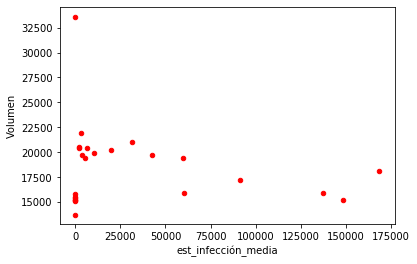

In [62]:
DATA_FINAL[(DATA_FINAL['Año']==2020) & (DATA_FINAL['id_Producto'] == 'L4O8DDDK') & (DATA_FINAL['Mercado'] == 'ES ORG H+S C. De Madrid')\
                       ].plot(kind='scatter', x='est_infección_media', y='Volumen', color='r')

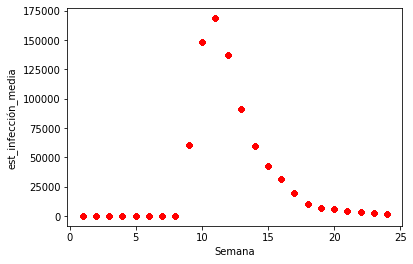

In [63]:
DATA_FINAL[(DATA_FINAL['Año']==2020) & (DATA_FINAL['Mercado'] == 'ES ORG H+S C. De Madrid')\
                       ].plot(kind='scatter', x='Semana', y='est_infección_media', color='r')

In [64]:
#DATA_FINAL[DATA_FINAL.isNan()]
DATA_FINAL[DATA_FINAL.isnull().any(axis=1)]

,Fecha,Año,Mes,Semana,Mercado,id_Mercado,id_Producto,Unidades,Items,Volumen,Volumen_promo,Volumen_NOpromo,Ratio_Promo_Volumen,Valor,Valor_promo,Valor_NOpromo,Ratio_Promo_Valor,Total_PGC,Sector,Seccion,Categoria,Escenario,Universo,Dist_Numerica,Dist_Ponderada,Trimestre,est_infección_media,est_infección_inf,est_infección_sup
36620,2020-02-02,2020,2,5,ES ORG H+S Asturias,MU6XO,L4O8DDFK,91.0,2543.0,91.0,NaN,NaN,NaN,113.0,NaN,NaN,NaN,TOTAL PGC,ALIM. Y BEBIDAS,LECHE Y BATIDOS,HORCHATA.,pre_confinement,441.0,42.0,57.0,1,0,0,0
36621,2020-02-09,2020,2,6,ES ORG H+S Asturias,MU6XO,L4O8DDFK,93.0,2444.0,92.0,NaN,NaN,NaN,115.0,NaN,NaN,NaN,TOTAL PGC,ALIM. Y BEBIDAS,LECHE Y BATIDOS,HORCHATA.,pre_confinement,440.0,39.0,56.0,1,0,0,0
41790,2017-12-24,2017,12,51,ES ORG H+S Asturias,MU6XO,L4O8DDF8,83.0,1560.0,19.0,NaN,NaN,NaN,140.0,NaN,NaN,NaN,TOTAL PGC,PROD.FRESCOS,CHARCUTERIA,SOBRASADA,pre_confinement,457.0,10.0,46.0,4,0,0,0
51764,2019-01-06,2019,1,1,ES ORG H+S Baleares,MU6XL,L4O8DDFK,466.0,7180.0,445.0,NaN,NaN,NaN,620.0,NaN,NaN,NaN,TOTAL PGC,ALIM. Y BEBIDAS,LECHE Y BATIDOS,HORCHATA.,pre_confinement,635.0,65.0,86.0,1,0,0,0
112564,2019-01-06,2019,1,1,ES ORG H+S Cantabria,MU6XP,L4O8DDFK,45.0,2177.0,45.0,NaN,NaN,NaN,63.0,NaN,NaN,NaN,TOTAL PGC,ALIM. Y BEBIDAS,LECHE Y BATIDOS,HORCHATA.,pre_confinement,463.0,33.0,70.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297535,NaT,2020,9,35,NaN,MU6XQ,L4O8DDCK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,238,93,785
297536,NaT,2020,9,36,NaN,MU6XQ,L4O8DDCK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,252,97,839
297537,NaT,2020,9,37,NaN,MU6XQ,L4O8DDCK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,270,102,900
297538,NaT,2020,9,38,NaN,MU6XQ,L4O8DDCK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,293,107,1004


## GDP

In [65]:
#PIB Espana 2017-2020 Q1
#https://fred.stlouisfed.org/series/CLVMNACSCAB1GQES
#Data 2017 - Q1,2020
GDP = pd.read_csv("GDP.csv", sep = ",")

In [66]:
#change dataframe
GDP.columns = ["DATE", "GDP"]
GDP['DATE'] = pd.to_datetime(GDP['DATE'],format='%Y-%m-%d')
GDP = GDP[GDP['DATE'] > "2016-12-31"]
GDP["Trimestre"] = GDP["DATE"].map(get_q)
GDP["Año"] = GDP["DATE"].dt.year
#GDP = GDP.drop('DATE', axis=1)

In [67]:
#Merge with DATA_FINAL
DATA_FINAL = DATA_FINAL.merge(GDP, how='outer', 
                   left_on=['Trimestre', 'Año'], 
                   right_on=['Trimestre', 'Año'])

In [68]:
#Add GDP Q2,2020 to FINAL_DATA
#PIB Espana 2020 Q2 = -16% -> Q1*0.84
#https://www.elconfidencial.com/economia/2020-06-25/banco-espana-estima-caida-pib-segundo-trimestre-22_2654968/
DATA_FINAL.loc[(DATA_FINAL['Trimestre'] > 1) & (DATA_FINAL['Año'] == 2020), 'GDP'] = 237327

## Turismo

In [69]:
#Turismo = pd.read_csv("Turismo.csv", sep=";")

In [70]:
#Turismo

## Inflation & Salary

In [71]:
Inflation = pd.read_csv("Inflation.csv", sep=",")
Inflation['Date'] = pd.to_datetime(Inflation['Date'],format='%b-%y')
Inflation = Inflation.rename(columns={'Date': 'Fecha', 'Inflation': 'Inflacion','Food Inflation':'Inflacion_Alimentacion',
                                       'Average Salary': 'Salario_Medio'})

In [72]:
Inflation.head()

,Fecha,Inflacion,Inflacion_Alimentacion,Salario_Medio
0,2017-01-01,0.030,0.010,2395
1,2017-02-01,0.030,0.017,2395
2,2017-03-01,0.023,0.014,2395
3,2017-04-01,0.026,0.011,2395
4,2017-05-01,0.019,0.011,2395


In [73]:
Inflation.dtypes

Fecha                     datetime64[ns]
Inflacion                        float64
Inflacion_Alimentacion           float64
Salario_Medio                      int64
dtype: object

In [74]:
#add year and month columns for mapping with DATA_FINAL
Inflation['Año'] = Inflation['Fecha'].dt.year
Inflation['Mes'] = Inflation['Fecha'].dt.month
Inflation = Inflation.drop('Fecha', axis=1)

In [75]:
#Merge with DATA_FINAL
DATA_FINAL = DATA_FINAL.merge(Inflation, how='left', 
                   left_on=['Mes', 'Año'], 
                   right_on=['Mes', 'Año'])

In [76]:
# NORNALIZING DATA:

#cols_to_norm = list(DATA.unique())
#DATA[cols_to_norm] = DATA[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

---

# FINAL DATASET

In [77]:
categorical_columns = ['id_Mercado','id_Producto','Sector', 'Seccion', 'Categoria', 'Escenario']
numerical_columns = ['est_infección_media','est_infección_inf','est_infección_sup','GDP','Inflacion','Inflacion_Alimentacion','Salario_Medio']
ordinal_columns = ['Fecha','Año','Mes','Trimestre','Semana']
target_columns = ['Volumen']
#target_columns = ['Unidades','Items','Volumen','Volumen_promo','Volumen_NOpromo','Valor','Valor_promo','Valor_NOpromo','Universo']

#'Total_PGC'

DATA_FINAL[categorical_columns] = DATA_FINAL[categorical_columns].astype("category")


DATA_FINAL.dtypes

#DATA_FINAL[categorical_columns]
#DATA_FINAL[numerical_columns]
#DATA_FINAL[ordinal_columns]
#DATA_FINAL[target_columns]


Fecha                     datetime64[ns]
Año                                int64
Mes                              float64
Semana                           float64
Mercado                           object
id_Mercado                      category
id_Producto                     category
Unidades                         float64
Items                            float64
Volumen                          float64
Volumen_promo                    float64
Volumen_NOpromo                  float64
Ratio_Promo_Volumen              float64
Valor                            float64
Valor_promo                      float64
Valor_NOpromo                    float64
Ratio_Promo_Valor                float64
Total_PGC                         object
Sector                          category
Seccion                         category
Categoria                       category
Escenario                       category
Universo                         float64
Dist_Numerica                    float64
Dist_Ponderada  

In [78]:
#DATA_FINAL = DATA_FINAL.sort_values('Fecha')
DATA_FINAL = DATA_FINAL.sort_values(['Semana','Año'])

pd.set_option('display.max_columns', None)
DATA_FINAL.tail()

,Fecha,Año,Mes,Semana,Mercado,id_Mercado,id_Producto,Unidades,Items,Volumen,Volumen_promo,Volumen_NOpromo,Ratio_Promo_Volumen,Valor,Valor_promo,Valor_NOpromo,Ratio_Promo_Valor,Total_PGC,Sector,Seccion,Categoria,Escenario,Universo,Dist_Numerica,Dist_Ponderada,Trimestre,est_infección_media,est_infección_inf,est_infección_sup,DATE,GDP,Inflacion,Inflacion_Alimentacion,Salario_Medio
232520,2019-12-29,2019,12.0,52.0,ES ORG H+S Pais Vasco,MU6XQ,L4O8DDCA,16988.0,380160.0,6412.0,1348.0,5064.0,0.210,75861.0,15499.0,60362.0,0.204,TOTAL PGC,PROD.FRESCOS,QUESOS,QUESO TRADICIONAL,pre_confinement,972.0,99.0,100.0,4,0.0,0.0,0.0,2019-10-01,298146.5,0.008,0.017,2750.0
232533,2019-12-29,2019,12.0,52.0,ES ORG H+S Pais Vasco,MU6XQ,L4O8DDCO,11387.0,68426.0,2751.0,1328.0,1423.0,0.483,19611.0,9859.0,9752.0,0.503,TOTAL PGC,PROD.FRESCOS,QUESOS,QUESOS BLANCOS PASTEURIZADOS,pre_confinement,972.0,99.0,100.0,4,0.0,0.0,0.0,2019-10-01,298146.5,0.008,0.017,2750.0
232546,2019-12-29,2019,12.0,52.0,ES ORG H+S Pais Vasco,MU6XQ,L4O8DDCQ,421.0,5508.0,93.0,8.0,85.0,0.086,563.0,48.0,515.0,0.085,TOTAL PGC,PROD.FRESCOS,QUESOS,REQUESON,pre_confinement,972.0,32.0,74.0,4,0.0,0.0,0.0,2019-10-01,298146.5,0.008,0.017,2750.0
232559,2019-12-29,2019,12.0,52.0,ES ORG H+S Pais Vasco,MU6XQ,L4O8DDCK,2760.0,63847.0,778.0,184.0,594.0,0.237,9134.0,2277.0,6857.0,0.249,TOTAL PGC,PROD.FRESCOS,QUESOS,RESTO QUESOS NATURALES,pre_confinement,972.0,89.0,99.0,4,0.0,0.0,0.0,2019-10-01,298146.5,0.008,0.017,2750.0
297540,NaT,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2017-01-01,280519.7,NaN,NaN,NaN


In [79]:
data = DATA_FINAL[categorical_columns + numerical_columns + ordinal_columns + target_columns]

In [80]:
#create historic data dataset and dataset for predictions
historic_data = data[data['Fecha']<='14-06-20']
forecasted_data = data[(data['Mes']>=6)&(data['Año']==2020)&(data['Semana']>24)]
#pre_confinement = data[data['Escenario']=='pre_confinement']
#confinement = data[data['Escenario']=='confinement']
#post_confinement = data[data['Escenario']=='post_confinement']


#Prediction > 14-06-20

In [81]:
historic_data.dtypes

id_Mercado                      category
id_Producto                     category
Sector                          category
Seccion                         category
Categoria                       category
Escenario                       category
est_infección_media              float64
est_infección_inf                float64
est_infección_sup                float64
GDP                              float64
Inflacion                        float64
Inflacion_Alimentacion           float64
Salario_Medio                    float64
Fecha                     datetime64[ns]
Año                                int64
Mes                              float64
Trimestre                          int64
Semana                           float64
Volumen                          float64
dtype: object

In [82]:
#add sector/section/categoria variables through mapping
PROD2 = PROD[PROD.HIER_LEVEL_NUM == 4]
sector_tag = dict(zip(PROD2.TAG, PROD2.SECTOR))
forecasted_data['Sector'] = forecasted_data['id_Producto'].map(sector_tag)
seccion_tag = dict(zip(PROD2.TAG, PROD2.SECCION))
forecasted_data['Seccion'] = forecasted_data['id_Producto'].map(seccion_tag)
categoria_tag = dict(zip(PROD2.TAG, PROD2.CATEGORIA))
forecasted_data['Categoria'] = forecasted_data['id_Producto'].map(categoria_tag)
#add scenario
forecasted_data.Escenario = 'post_confinement'
#delete useless columns
forecasted_data = forecasted_data.drop(['Fecha'], axis=1)

/Users/anna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/anna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [83]:
categorical_columns = ['id_Mercado','id_Producto','Sector', 'Seccion', 'Categoria', 'Escenario']
numerical_columns = ['est_infección_media','est_infección_inf','est_infección_sup','GDP','Inflacion','Inflacion_Alimentacion','Salario_Medio']
ordinal_columns = ['Año','Mes','Trimestre','Semana']
target_columns = ['Volumen']
#target_columns = ['Unidades','Items','Volumen','Volumen_promo','Volumen_NOpromo','Valor','Valor_promo','Valor_NOpromo','Universo']

#'Total_PGC'

historic_data[categorical_columns] = historic_data[categorical_columns].astype("category")
forecasted_data[categorical_columns] = forecasted_data[categorical_columns].astype("category")
forecasted_data.dtypes

/Users/anna/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


id_Mercado                category
id_Producto               category
Sector                    category
Seccion                   category
Categoria                 category
Escenario                 category
est_infección_media        float64
est_infección_inf          float64
est_infección_sup          float64
GDP                        float64
Inflacion                  float64
Inflacion_Alimentacion     float64
Salario_Medio              float64
Año                          int64
Mes                        float64
Trimestre                    int64
Semana                     float64
Volumen                    float64
dtype: object

---

### EXPORTING csv

In [84]:
#DATA_FINAL.to_csv('DATA_FINAL.csv', index = False)

---

# NOTES

Vtas (Vol) (en promocion) = <br>
Vtas (Vol) (display + folleto) PLUS Vtas (Vol) (display) PLUS Vtas (Vol) (folleto) +Vtas (Vol) (reduccion temp. de precio) + Vtas (Vol) (resto promociones)


Vtas (Valor) (en promocion) = <br>
Vtas (Valor) (display + folleto)  PLUS Vtas (Valor) (display) PLUSVtas (Valor) (folleto) +Vtas (Valor) (reduccion temp. de precio)
+Vtas (Valor) (resto promociones)

PROD[PROD['PARENT_TAG']== 'L4O8DDGU'] 
FirstProduct = factdata.loc[(factdata['PROD_TAG'] == 'L4O8DDH0') & (factdata['PER_TAG']== 'W2017015') & (factdata['MKT_TAG'] == 'MTHO7')]
SecondProduct = factdata.loc[(factdata['PROD_TAG'] == 'L4O8DDGW') & (factdata['PER_TAG']== 'W2017015') & (factdata['MKT_TAG'] == 'MTHO7')]
ThirdProduct = factdata.loc[(factdata['PROD_TAG'] == 'L4O8DDGY') & (factdata['PER_TAG']== 'W2017015') & (factdata['MKT_TAG'] == 'MTHO7')]
ParentProduct = factdata.loc[(factdata['PROD_TAG'] == 'L4O8DDGU') & (factdata['PER_TAG']== 'W2017015') & (factdata['MKT_TAG'] == 'MTHO7')]

FirstProduct['U'][1] + SecondProduct['U'][701] + ThirdProduct['U'][997]

ParentProduct['U'][0]